# Regression Neural Networks using Tensorflow

In [2]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Creating data


In [3]:
# features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

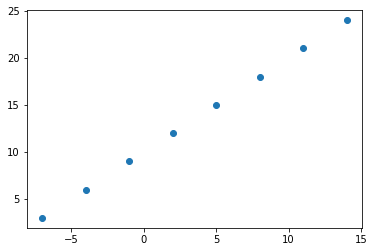

In [4]:
# visualize data
plt.scatter(X, y)

In [5]:
# turning numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Modelling with Tensorflow

1. Create a model
2. Compiling the model
3. Fitting the model

In [6]:
tf.random.set_seed(42)

# Creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fitting the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 683ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [7]:
# make a prediction
model.predict([20.0])

array([[14.9512005]], dtype=float32)

## Improving the model
alter the steps we went through earlier

In [8]:
tf.random.set_seed(42)

# Creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(lr=0.01),
              metrics = ['mae'])

# Fitting the model
model.fit(X, y, epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 355ms/step - loss: 11.9988 - mae: 11.9988
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4313 - mae: 11.4313
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8595 - mae: 10.8595
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2791 - mae: 10.2791
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6752 - mae: 9.6752
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0413 - mae: 9.0413
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.3721 - mae: 8.3721
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6559 - mae: 7.6559
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 6.8994 - mae: 6.8994
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.0954 - mae: 6.0954
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - 

In [9]:
model.predict([19.0])

array([[34.888367]], dtype=float32)

In [10]:
# Making a bigger data set
X = tf.range(-100, 100, 4)
y = X + 10


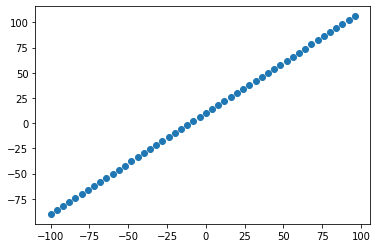

In [11]:
# visualize the data
plt.scatter(X, y)

## Splitting the data (generally 3 sets)
* Training set
* Validation set
* Test set

In [12]:
# Splitting the data
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualize the data

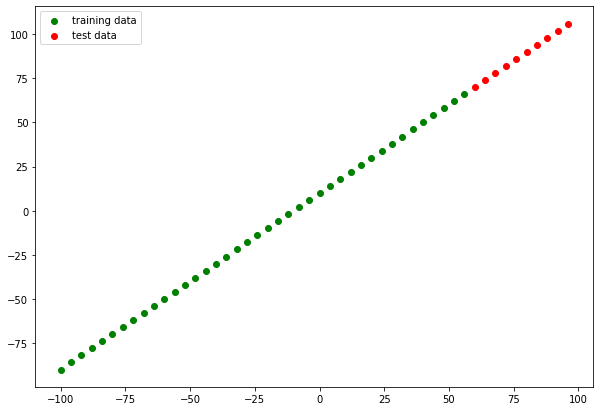

In [13]:
plt.figure(figsize=(10, 7))

# plot the training data set
plt.scatter(X_train, y_train, color='green', label='training data')

# plot the testing data set
plt.scatter(X_test, y_test, color='red', label='test data')

plt.legend()

In [14]:
X.shape

TensorShape([50])

In [15]:
# Creating a model (defining input shape as function argument)
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
  tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# Compiling
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [16]:
model.summary()
# Dense meaning a fully connected layer

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters of the model
* Trainable parameters - the parameters (patterns) the model can update as it trains
* Non-trainable params - parameters that are not updated during training

In [17]:
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

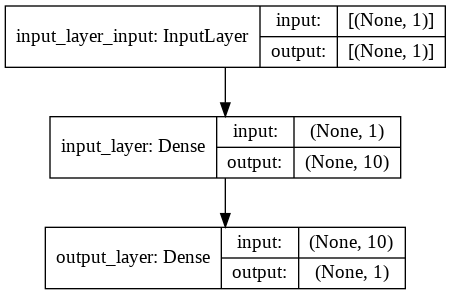

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Visualize the model predictions
* plot them against the ground truth labels

In [19]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [20]:
# Plotting function

def plot_pred(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, color='blue', label='Training data')
  plt.scatter(test_data, test_labels, color='green', label='Testing data')
  plt.scatter(test_data, predictions, color='red', label='Predictions')
  plt.legend()
  plt.show()

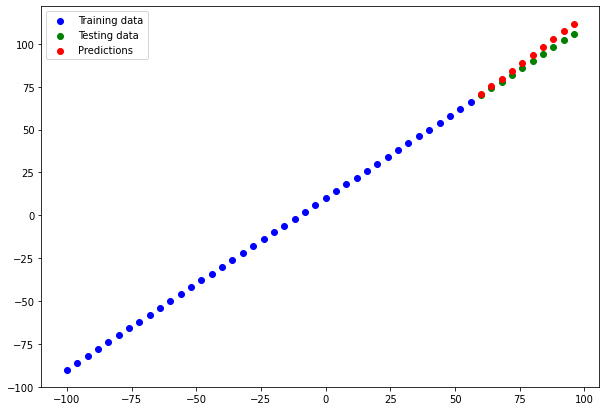

In [21]:
plot_pred()

## Evaluating the model's predictions with regression evaluation metrics
2 of the main metrics:
* MAE - mean absolute error
* MSE - mean square error

In [22]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [23]:
# Calculate the MAE
mae_pred = tf.keras.metrics.mean_absolute_error(
    y_test, y_pred
)
mae_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [24]:
# We need to shape the tensors to be the same
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [25]:
# Recalculate the MAE
mae = tf.keras.metrics.mean_absolute_error(
    y_true=y_test, 
    y_pred=tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [26]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [27]:
# Make functions for MSE and MAE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, y_pred)
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, y_pred)

### Improving the models
Steps:
* Build a model ->
* Fit it ->
* Evaluate the model ->
* Tweak it ->
* Fit it ->
* Evaluate it
* Tweak it ->
...

# Top ways to improve models
1. Get more date
2. Make your model longer (more complex model)
3. Train for longer

In [28]:
# Creating a model (defining input shape as function argument)
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name='model_1')

# Compiling
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mse'])

# Fitting the model
model_1.fit(X_train, y_train, epochs=250, verbose=0)

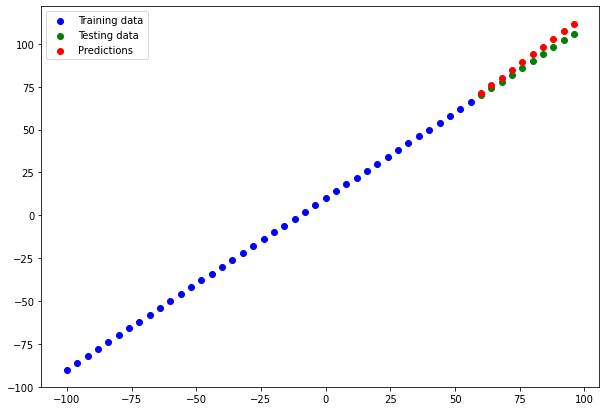

In [29]:
y_pred1 = model_1.predict(X_test)
plot_pred(predictions=tf.squeeze(y_pred1))

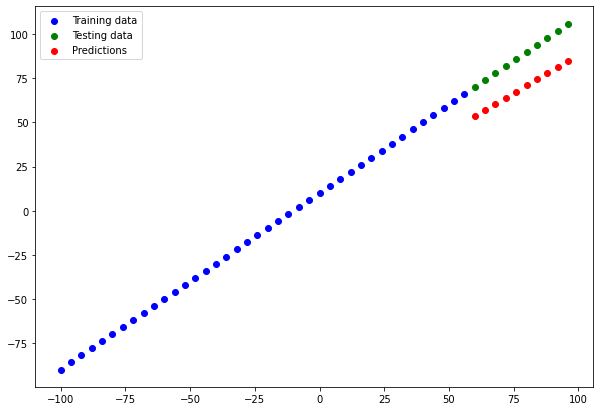

In [30]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
], name='model_2')
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model_2.fit(X_train, y_train, epochs=100, verbose=0)
y_pred2 = model_2.predict(X_test)
plot_pred(predictions=tf.squeeze(y_pred2))

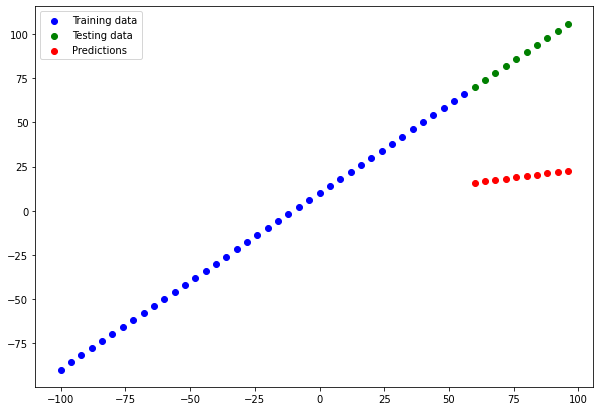

In [31]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name='model_3')
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model_3.fit(X_train, y_train, epochs=500, verbose=0)
y_pred3 = model_3.predict(X_test)
plot_pred(predictions=tf.squeeze(y_pred3))

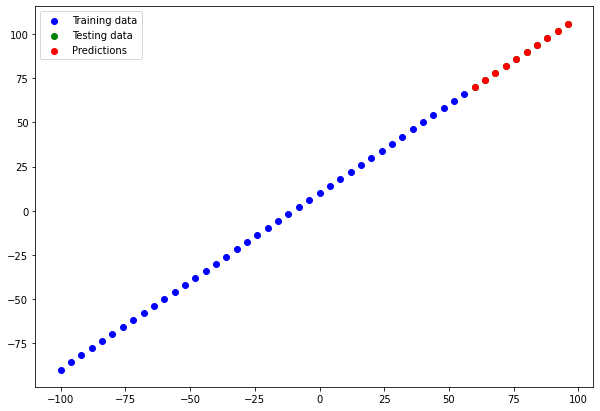

In [32]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name='model_4')
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])
model_4.fit(X_train, y_train, epochs=1000, verbose=0)
y_pred4 = model_4.predict(X_test)
plot_pred(predictions=tf.squeeze(y_pred4))

## Comparing model's results using panadas DataFrame

In [33]:
# Getting statistics from past models
mae_1 = mae(y_test, tf.squeeze(y_pred1))
mse_1 = mse(y_test, tf.squeeze(y_pred1))
mae_2 = mae(y_test, tf.squeeze(y_pred2))
mse_2 = mse(y_test, tf.squeeze(y_pred2))
mae_3 = mae(y_test, tf.squeeze(y_pred3))
mse_3 = mse(y_test, tf.squeeze(y_pred3))
mae_4 = mae(y_test, tf.squeeze(y_pred4))
mse_4 = mse(y_test, tf.squeeze(y_pred4))

In [34]:
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()],
                 ['model_4', mae_4.numpy(), mse_4.numpy()]]
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,3.615227,15.109919
1,model_2,18.745327,353.573364
2,model_3,68.713615,4808.027344
3,model_4,0.020437,0.000423


## Saving the models

In [35]:
# Saving using the SavedModel format
model_4.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [37]:
# Saving using the HDF5 format
model_4.save('best_model_HDF5_format.h5')

## Loading saved models

In [41]:
# Loading the SavedModel model
loaded_SavedModel = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compare the predictions from SavedModel model with the model 4 predictions
model_4_pred = model_4.predict(X_test)
loaded_SavedModel_pred = loaded_SavedModel.predict(X_test)
model_4_pred == loaded_SavedModel_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [45]:
# Loading the HDF5 model
loaded_HDF5 = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_HDF5.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compare the predictions from SavedModel model with the model 4 predictions
model_4_pred = model_4.predict(X_test)
loaded_HDF5 = loaded_SavedModel.predict(X_test)
model_4_pred == loaded_HDF5

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download files or models

In [48]:
# Download from Google Colab
from google.colab import files

#files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>